In [19]:
import pandas as pd
import mplfinance as mpf

# Understanding the data

In [20]:
class Helper:
    def __init__(self, spy):
        self.data = spy
        self.plotdata  = []
    def candle_stick_plot(self, additional_lines=[], start_date="2008-01-01", end_date="2008-12-31"):
        """
        Plots a candlestick chart for the given date range.

        Parameters:
        - additional_lines (list of tuples): A list of tuples where each tuple contains the name of the additional column and the color for that line.
        - start_date (str): The start date for the plot in 'YYYY-MM-DD' format.
        - end_date (str): The end date for the plot in 'YYYY-MM-DD' format.
        
        Raises:
        ValueError: If additional_lines is not a list of tuples or if a color is not valid.
        """
        # List of predefined colors
        color_options = ['red', 'blue', 'green', 'orange', 'purple', 'cyan']

        # Check if additional_lines is a list of tuples
        if not isinstance(additional_lines, list) or not all(isinstance(item, tuple) and len(item) == 2 for item in additional_lines):
            raise ValueError("additional_lines must be a list of tuples (column_name, color).")

        # Validate the colors in the additional_lines
        for column_name, color in additional_lines:
            if color not in color_options:
                raise ValueError(f"Color '{color}' for column '{column_name}' is not valid. Must be one of {color_options}.")

        # Select required columns
        required_col = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume'] + [col for col, _ in additional_lines]
        df = self.data[required_col]

        # Convert 'Date' to datetime and set it as the index
        df.loc[:, 'Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)

        # Filter the DataFrame for the specific date range
        df_filtered = df[start_date:end_date]

        # Check if the filtered DataFrame is empty
        if df_filtered.empty:
            print("No data available for the specified date range.")
            return

        # Create additional plots for each specified column
        add_plots = [mpf.make_addplot(df_filtered[column_name], color=color) for column_name, color in additional_lines]

        # Plot the candlestick chart with the additional lines
        mpf.plot(df_filtered, type='candle', style='charles', 
                 title='Candlestick Chart', ylabel='Price', volume=True,
                 addplot=add_plots)

In [21]:
SPY = pd.read_csv("SPY_500_Data.csv")
helper = Helper(SPY)

d:\code\envs\ECON4305\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


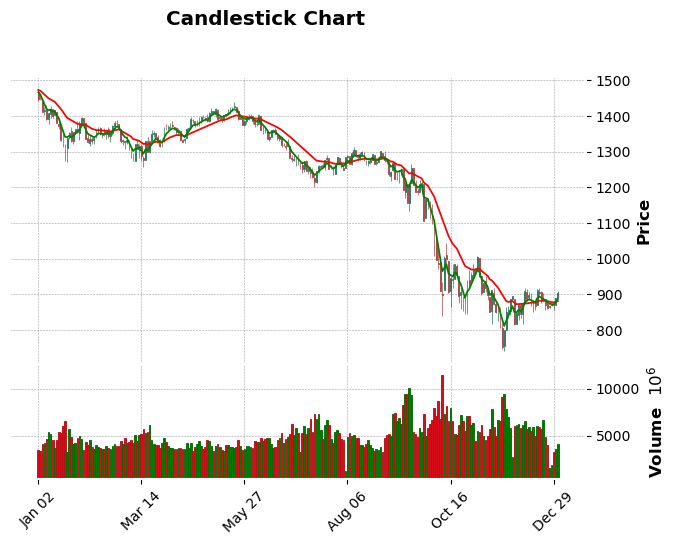

In [22]:
# Example usage with multiple additional lines
additional_lines = [
    ("p_ema_20", "red"), 
    ("p_ema_5", "green")
]

# Call the method with the additional lines
helper.candle_stick_plot(additional_lines=additional_lines)

# Creating new features

to do:
1. define target
2. create some meaningful features (gloden cross, dead cross)
3. update to a new csv

##  define target

In [23]:
SPY ['target'] = (SPY ['Close'].shift(-5) > SPY['Close']).astype(int)
SPY  = SPY .dropna()
SPY

,Date,Open,High,Low,Close,Volume,p_sma_5,p_sma_10,p_sma_20,p_sma_50,...,pvo_signal,pvo_hist,cmo,cmo_signal,dmi,ko,ko_signal,smi,smi_signal,target
250,1986-12-26,246.750000,247.089996,246.729996,246.919998,48860000,247.697998,247.842999,249.416500,245.331000,...,0.102228,-5.425167,-21.197020,-23.760447,48.009243,-5.195933e+08,-5.207434e+08,-49.868806,-43.480796,1
251,1986-12-29,246.899994,246.919998,244.309998,244.669998,99800000,246.685999,247.574998,249.189000,245.433800,...,-1.369826,-5.888214,-29.116229,-26.438338,42.540143,-6.510150e+08,-5.393537e+08,-60.984404,-52.232600,1
252,1986-12-30,244.660004,244.669998,243.039993,243.369995,126200000,245.609998,247.090997,248.905000,245.524400,...,-2.534283,-4.657828,-27.222506,-26.830422,38.542213,-8.775885e+08,-5.876729e+08,-69.608947,-60.920773,1
253,1986-12-31,243.369995,244.029999,241.279999,242.169998,139200000,244.775998,246.303998,248.313499,245.648400,...,-3.285501,-3.004875,-41.403752,-34.117087,30.814516,-1.109652e+09,-6.622413e+08,-72.407873,-66.664323,1
254,1987-01-02,242.169998,246.449997,242.169998,246.449997,91880000,244.715997,246.192998,247.943499,245.859800,...,-4.302982,-4.069921,-7.570438,-20.843762,49.306419,-9.772393e+08,-7.072410e+08,-52.576828,-59.620575,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9238,2022-08-25,4153.259766,4200.540039,4147.589844,4199.120117,2976050000,4167.018066,4227.536084,4187.390552,3990.834619,...,-2.820624,-1.361044,11.290710,7.188892,57.057106,1.352025e+10,2.180170e+10,-33.739030,-17.749266,0
9239,2022-08-26,4198.740234,4203.040039,4057.659912,4057.659912,3175260000,4132.854053,4205.287085,4183.759045,3996.188018,...,-3.068944,-0.993284,-13.420630,-3.115869,42.844444,8.563717e+09,1.991056e+10,-51.071411,-34.410339,0
9240,2022-08-29,4034.580078,4062.989990,4017.419922,4030.610107,2963020000,4111.378027,4178.634082,4179.358057,4003.464819,...,-3.344931,-1.103946,-14.734367,-8.925118,36.222988,8.615072e+08,1.718926e+10,-63.918175,-49.164257,0
9241,2022-08-30,4041.250000,4044.979980,3965.209961,3986.159912,3190580000,4082.864014,4146.730054,4174.106555,4009.691216,...,-3.504591,-0.638640,-38.626458,-23.775788,28.190144,-6.630603e+09,1.378643e+10,-70.673139,-59.918698,0


##  create some meaningful features (gloden cross, dead cross)

Golden Cross:
A Golden Cross occurs when a shorter-term moving average crosses above a longer-term moving average. This is typically seen as a bullish signal, indicating potential upward momentum in the stock price.
Commonly used moving averages for this analysis are the 50-day and 200-day Simple Moving Averages (SMA).

In [24]:
SPY['golden_cross'] = ((SPY['p_sma_50'] > SPY['p_sma_200']) & 
                       (SPY['p_sma_50'].shift(1) <= SPY['p_sma_200'].shift(1))).astype(int)

C:\Users\13579\AppData\Local\Temp\ipykernel_98376\218390922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SPY['golden_cross'] = ((SPY['p_sma_50'] > SPY['p_sma_200']) &


Dead Cross:
A Dead Cross occurs when a shorter-term moving average crosses below a longer-term moving average. This is generally interpreted as a bearish signal, suggesting potential downward momentum in the stock price.
Again, the 50-day and 200-day SMAs are commonly utilized for this feature.

In [25]:
SPY['dead_cross'] = ((SPY['p_sma_50'] < SPY['p_sma_200']) & 
                     (SPY['p_sma_50'].shift(1) >= SPY['p_sma_200'].shift(1))).astype(int)

C:\Users\13579\AppData\Local\Temp\ipykernel_98376\1901312317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SPY['dead_cross'] = ((SPY['p_sma_50'] < SPY['p_sma_200']) &


if 50 MA > 200 MA

In [26]:
SPY['ma_50_vs_200'] = (SPY['p_sma_50'] >= SPY['p_sma_200']).astype(int)

C:\Users\13579\AppData\Local\Temp\ipykernel_98376\3448540839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SPY['ma_50_vs_200'] = (SPY['p_sma_50'] >= SPY['p_sma_200']).astype(int)


In [27]:
SPY = SPY.dropna()
SPY

,Date,Open,High,Low,Close,Volume,p_sma_5,p_sma_10,p_sma_20,p_sma_50,...,cmo_signal,dmi,ko,ko_signal,smi,smi_signal,target,golden_cross,dead_cross,ma_50_vs_200
250,1986-12-26,246.750000,247.089996,246.729996,246.919998,48860000,247.697998,247.842999,249.416500,245.331000,...,-23.760447,48.009243,-5.195933e+08,-5.207434e+08,-49.868806,-43.480796,1,0,0,1
251,1986-12-29,246.899994,246.919998,244.309998,244.669998,99800000,246.685999,247.574998,249.189000,245.433800,...,-26.438338,42.540143,-6.510150e+08,-5.393537e+08,-60.984404,-52.232600,1,0,0,1
252,1986-12-30,244.660004,244.669998,243.039993,243.369995,126200000,245.609998,247.090997,248.905000,245.524400,...,-26.830422,38.542213,-8.775885e+08,-5.876729e+08,-69.608947,-60.920773,1,0,0,1
253,1986-12-31,243.369995,244.029999,241.279999,242.169998,139200000,244.775998,246.303998,248.313499,245.648400,...,-34.117087,30.814516,-1.109652e+09,-6.622413e+08,-72.407873,-66.664323,1,0,0,1
254,1987-01-02,242.169998,246.449997,242.169998,246.449997,91880000,244.715997,246.192998,247.943499,245.859800,...,-20.843762,49.306419,-9.772393e+08,-7.072410e+08,-52.576828,-59.620575,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9238,2022-08-25,4153.259766,4200.540039,4147.589844,4199.120117,2976050000,4167.018066,4227.536084,4187.390552,3990.834619,...,7.188892,57.057106,1.352025e+10,2.180170e+10,-33.739030,-17.749266,0,0,0,0
9239,2022-08-26,4198.740234,4203.040039,4057.659912,4057.659912,3175260000,4132.854053,4205.287085,4183.759045,3996.188018,...,-3.115869,42.844444,8.563717e+09,1.991056e+10,-51.071411,-34.410339,0,0,0,0
9240,2022-08-29,4034.580078,4062.989990,4017.419922,4030.610107,2963020000,4111.378027,4178.634082,4179.358057,4003.464819,...,-8.925118,36.222988,8.615072e+08,1.718926e+10,-63.918175,-49.164257,0,0,0,0
9241,2022-08-30,4041.250000,4044.979980,3965.209961,3986.159912,3190580000,4082.864014,4146.730054,4174.106555,4009.691216,...,-23.775788,28.190144,-6.630603e+09,1.378643e+10,-70.673139,-59.918698,0,0,0,0


## save to cleaned.csv

In [28]:
SPY.to_csv('clean.csv', index=False)